In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
benefatcor_data = pd.read_csv('BenefactorsData.csv')
benefatcor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278386 entries, 0 to 278385
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      278386 non-null  int64 
 1   UserID          278386 non-null  int64 
 2   Gender          278149 non-null  object
 3   State           278386 non-null  object
 4   BirthDate       221817 non-null  object
 5   ReferralSource  278386 non-null  object
dtypes: int64(2), object(4)
memory usage: 12.7+ MB


In [3]:
benefatcor_data.drop(columns='Unnamed: 0', axis= 1)

,UserID,Gender,State,BirthDate,ReferralSource
0,3,زن,تهران,1363-08-16,Acquaintances
1,8,مرد,تهران,1364-06-24,Acquaintances
2,14,مرد,تهران,1356-07-07,Acquaintances
3,17,زن,تهران,1325-07-23,Acquaintances
4,18,زن,تهران,1334-10-06,Acquaintances
...,...,...,...,...,...
278381,262139,مرد,تهران,1357-04-10,Application
278382,262140,مرد,تهران,1354-10-01,Application
278383,262141,مرد,فارس,1373-05-31,Application
278384,262142,زن,البرز,NaN,Advertisements


In [4]:
transaction_data = pd.read_csv('TransactionalData.csv')
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490797 entries, 0 to 1490796
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Unnamed: 0     1490797 non-null  int64 
 1   TransID        1490797 non-null  int64 
 2   UserID         1490797 non-null  int64 
 3   PaymentDate    1490797 non-null  object
 4   PaymentAmount  1490797 non-null  int64 
 5   SupportType    1490797 non-null  object
dtypes: int64(4), object(2)
memory usage: 68.2+ MB


In [5]:
filterered_data = transaction_data[(transaction_data['PaymentAmount'] > 1000) & (transaction_data['SupportType']== 'Membership Fee')].drop(columns='Unnamed: 0', axis= 1)
filterered_data

,TransID,UserID,PaymentDate,PaymentAmount,SupportType
0,850001,174731,2016-03-20,200000,Membership Fee
2,850003,145833,2016-03-20,50000,Membership Fee
3,850004,177032,2016-03-20,22000,Membership Fee
4,850005,147147,2016-03-20,50000,Membership Fee
5,850006,113029,2016-03-20,200000,Membership Fee
...,...,...,...,...,...
1490789,2340797,262302,2018-09-08,50000,Membership Fee
1490790,2340798,261466,2018-09-08,2000,Membership Fee
1490791,2340799,255011,2018-09-08,30000,Membership Fee
1490793,2340801,278235,2018-09-08,10000,Membership Fee


In [6]:
agg_data = filterered_data.groupby(['UserID','PaymentDate']).agg({'PaymentAmount':'sum',
                                                                   'TransID':'count' }).reset_index()
agg_data

,UserID,PaymentDate,PaymentAmount,TransID
0,0,2016-09-13,300000,1
1,0,2017-09-13,500000,1
2,1,2018-06-15,150000,1
3,3,2016-08-11,40000,1
4,3,2016-09-24,50000,1
...,...,...,...,...
1016897,278376,2018-09-07,10000,1
1016898,278377,2018-09-08,10000,1
1016899,278378,2018-09-08,50000,1
1016900,278379,2018-09-08,20000,1


In [7]:
summary_of_payment = transaction_data.groupby('SupportType').agg(Members=('SupportType','count'),
                                                                Total_Payment=('PaymentAmount','sum'
                                                                               )
                                                                )
summary_of_payment = summary_of_payment.sort_values(by='Total_Payment',ascending=False)
summary = summary_of_payment.style.format("{:,}")
summary

,Members,Total_Payment
SupportType,,
Household Fund,"320,706","621,580,067,126"
Cash,"77,267","280,804,124,368"
Membership Fee,"1,040,930","246,844,482,188"
Financial Aid,"21,070","203,653,891,350"
Product Purchase,"30,824","103,369,849,580"


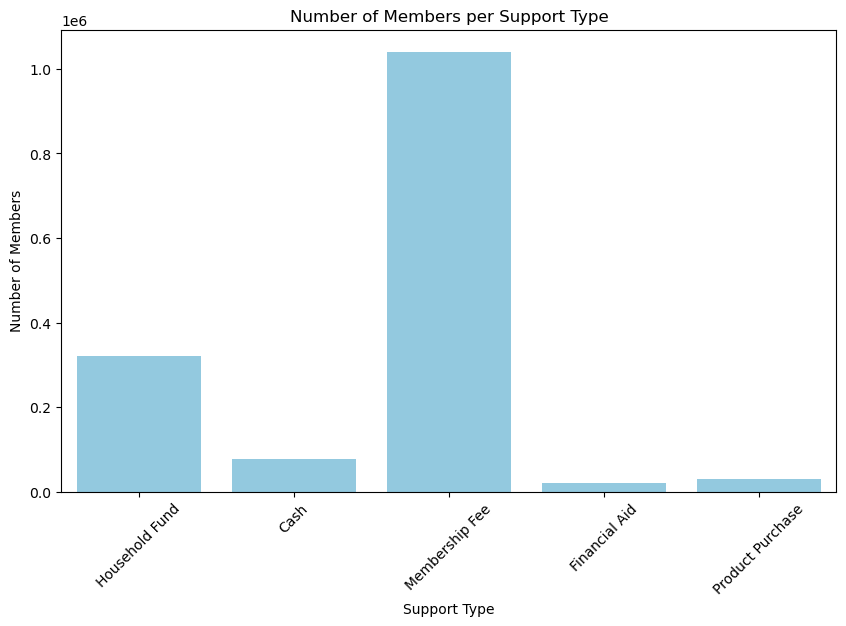

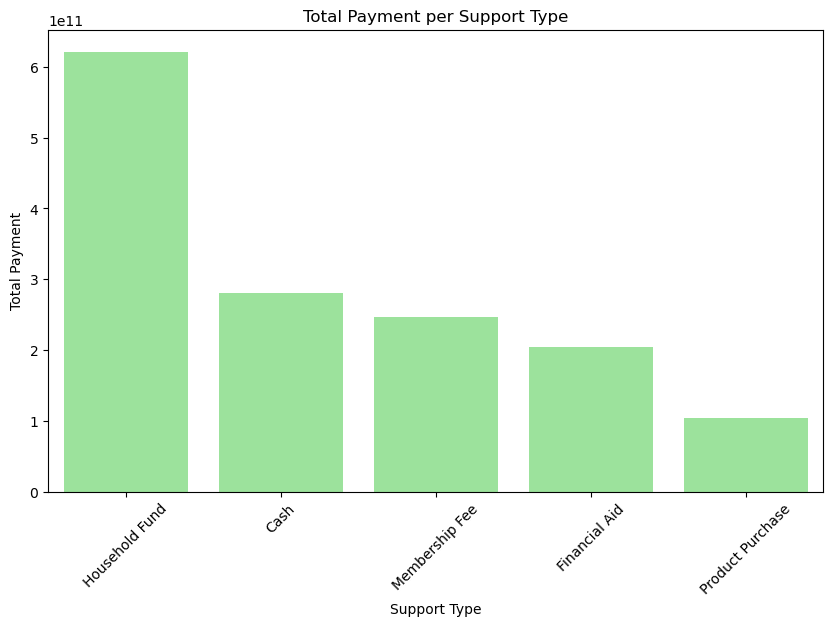

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure summary_of_payment is defined and contains the necessary columns
# Example:
# summary_of_payment = pd.DataFrame({
#     'SupportType': ['Type1', 'Type2', 'Type3'],
#     'Members': [100, 150, 200],
#     'Total_Payment': [10000, 15000, 20000]
# })

# Check for missing data and handle it if necessary
if summary_of_payment.isnull().any().any():
    summary_of_payment = summary_of_payment.dropna().sort_values(ascending=False)  # or use another method to handle missing data

# Plotting the number of members per SupportType using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='SupportType', y='Members', data=summary_of_payment, color='skyblue')
plt.xlabel('Support Type')
plt.ylabel('Number of Members')
plt.title('Number of Members per Support Type')
plt.xticks(rotation=45)
plt.show()

# Plotting the total payment per SupportType using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='SupportType', y='Total_Payment', data=summary_of_payment, color='lightgreen')
plt.xlabel('Support Type')
plt.ylabel('Total Payment')
plt.title('Total Payment per Support Type')
plt.xticks(rotation=45)
plt.show()


In [9]:
agg_data['PaymentDate'] = pd.to_datetime(agg_data['PaymentDate'])

In [10]:
last_date = agg_data['PaymentDate'].max()

In [11]:
final_agg = agg_data.groupby('UserID').agg(
    R =('PaymentDate', lambda x: (last_date-x.max()).days),
    F =('PaymentDate','count'),
    M =("PaymentAmount",'sum'),
    D =('PaymentDate', lambda x: (x.max()-x.min()).days) 
).reset_index()

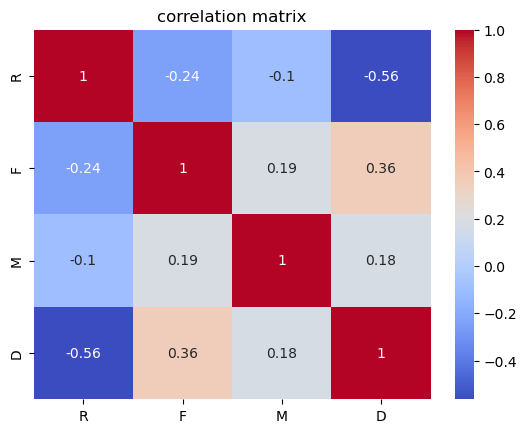

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = final_agg[['R','F', 'M', 'D']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show;


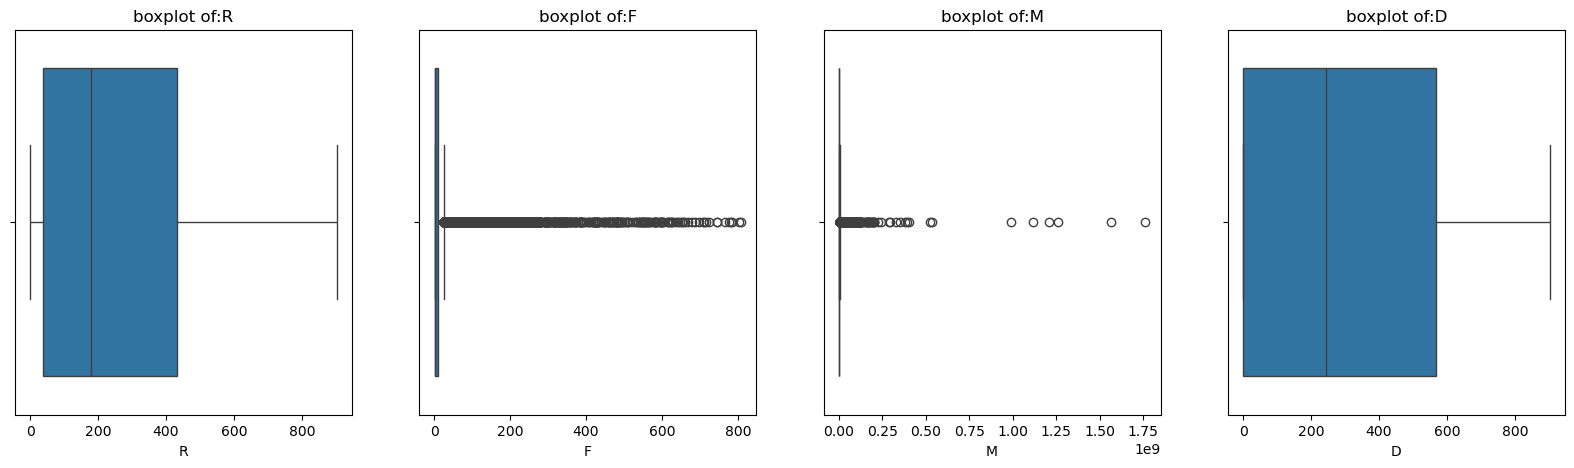

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

box_cloumns = ['R','F', 'M', 'D']
fig, axes = plt.subplots(1, len(box_cloumns), figsize=(20,5), sharey=True)

for i,col in enumerate(box_cloumns):
    sns.boxplot(data=final_agg, x=col, ax=axes[i])
    axes[i].set_title(f'boxplot of:{col}')
plt.tight_layout
plt.show;


In [14]:
skewness = final_agg[['R', 'F', 'M', 'D']].skew().to_frame("skewness").T
kurtosis = final_agg[['R', 'F', 'M', 'D']].kurtosis().to_frame('kurtosis').T
describe = final_agg[['R','F','M','D']].describe()
result = pd.concat([describe, skewness, kurtosis])

print(result)

                     R             F             M             D
count     94278.000000  94278.000000  9.427800e+04  94278.000000
mean        259.487399     10.786207  2.618056e+06    312.895607
std         249.373458     29.475161  1.316884e+07    306.942116
min           0.000000      1.000000  1.100000e+03      0.000000
25%          38.000000      1.000000  1.500000e+05      0.000000
50%         178.000000      3.000000  6.000000e+05    243.000000
75%         433.000000     11.000000  2.100000e+06    567.750000
max         902.000000    808.000000  1.762691e+09    902.000000
skewness      0.851225     11.807394  7.547326e+01      0.523007
kurtosis     -0.333546    198.377696  8.101188e+03     -1.162744


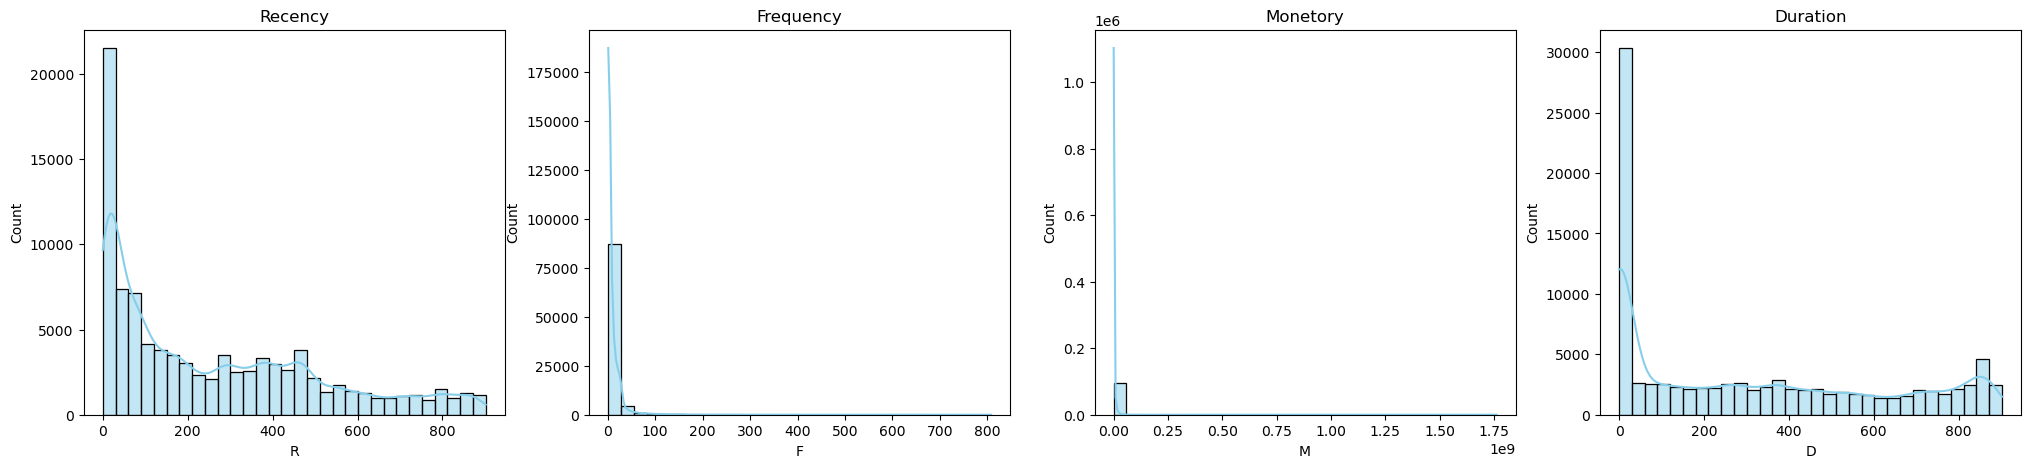

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,len(box_cloumns), figsize=(25, 5))
axes = axes.flatten()
box_cloumns = ['R','F', 'M', 'D']
titles = ['Recency', 'Frequency', 'Monetory', 'Duration']
for i, col in enumerate(box_cloumns):
    sns.histplot(final_agg[col], kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(titles[i])

plt.tight_layout
plt.show;



In [16]:
# Define the bins and corresponding labels for the 'R' (Recency) score
# 'R' represents the number of days since the last transaction.
# Customers are segmented into 5 groups based on recency:
#   - [0, 60): Score 5 (most recent)
#   - [60, 180): Score 4
#   - [180, 365): Score 3
#   - [365, 545): Score 2
#   - [545, inf): Score 1 (least recent)
final_agg['R_score'] = pd.cut(
    final_agg['R'],
    bins=[0, 60, 180, 365, 545, float('inf')],
    labels=[5, 4, 3, 2, 1],
    right=False
)

# Define the bins and corresponding labels for the 'F' (Frequency) score
# 'F' represents the number of transactions made by a customer.
# Customers are segmented into 5 groups based on frequency:
#   - [1, 2): Score 1 (least frequent)
#   - [2, 5): Score 2
#   - [5, 10): Score 3
#   - [10, 20): Score 4
#   - [20, inf): Score 5 (most frequent)
final_agg['F_score'] = pd.cut(
    final_agg['F'],
    bins=[1, 2, 5, 10, 20, float('inf')],
    labels=[1, 2, 3, 4, 5],
    right=False
)

# Define the bins and corresponding labels for the 'M' (Monetary) score
# 'M' represents the monetary value of transactions made by a customer.
# Customers are segmented into 5 groups based on monetary value:
#   - [0, 500_000): Score 1 (lowest spending)
#   - [500_000, 1_200_000): Score 2
#   - [1_200_000, 2_500_000): Score 3
#   - [2_500_000, 10_000_000): Score 4
#   - [10_000_000, inf): Score 5 (highest spending)
final_agg['M_score'] = pd.cut(
    final_agg['M'],
    bins= [0, 500_000, 1_200_000, 2_500_000, 10_000_000, float('inf')],
    labels=[1, 2, 3, 4, 5],
    right=False
)

# Define the bins and corresponding labels for an additional score 'D'
# This seems to be another segmentation based on recency ('R'), but with different groupings:
#   - [0, 1): Score 1 (most recent)
#   - [1, 180): Score 2
#   - [180, 365): Score 3
#   - [365, 545): Score 4
#   - [545, inf): Score 5 (least recent)
final_agg['D_score'] = pd.cut(
    final_agg['D'],
    bins=[0, 1, 180, 365, 545, float('inf')],
    labels=[1, 2, 3, 4, 5],
    right=False
)

final_agg


,UserID,R,F,M,D,R_score,F_score,M_score,D_score
0,0,360,2,800000,365,3,2,2,4
1,1,85,1,150000,0,4,1,1,1
2,3,216,7,290000,542,3,3,1,4
3,5,434,1,10000000,0,2,1,5,1
4,11,824,1,200000,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
94273,278376,1,1,10000,0,5,1,1,1
94274,278377,0,1,10000,0,5,1,1,1
94275,278378,0,1,50000,0,5,1,1,1
94276,278379,0,1,20000,0,5,1,1,1


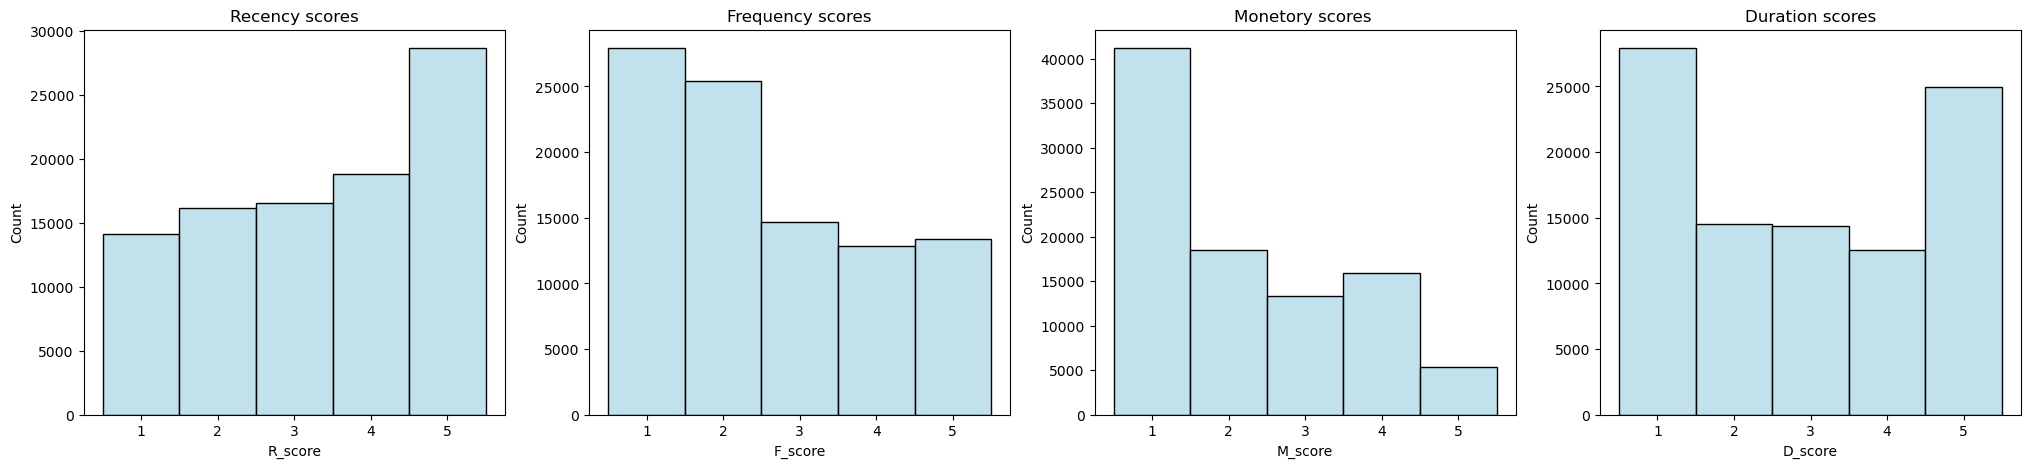

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

scores = ['R_score', 'F_score', 'M_score', 'D_score']
titles = ['Recency scores','Frequency scores', 'Monetory scores ', 'Duration scores']

fig, axes = plt.subplots(1, len(scores), figsize=(25,5))
axes = axes.flatten()

for i, col in enumerate(scores):
    sns.histplot(final_agg[col], kde=False,ax=axes[i], bins=5, color='lightblue')
    axes[i].set_title(titles[i])


plt.tight_layout
plt.show;

# <div style="text-align:center; border-radius:50px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Benefactors Data Processing</b></div>

In [18]:
df_bene = pd.read_csv('BenefactorsData.csv')
df_bene

,Unnamed: 0,UserID,Gender,State,BirthDate,ReferralSource
0,0,3,زن,تهران,1363-08-16,Acquaintances
1,1,8,مرد,تهران,1364-06-24,Acquaintances
2,2,14,مرد,تهران,1356-07-07,Acquaintances
3,3,17,زن,تهران,1325-07-23,Acquaintances
4,4,18,زن,تهران,1334-10-06,Acquaintances
...,...,...,...,...,...,...
278381,278381,262139,مرد,تهران,1357-04-10,Application
278382,278382,262140,مرد,تهران,1354-10-01,Application
278383,278383,262141,مرد,فارس,1373-05-31,Application
278384,278384,262142,زن,البرز,NaN,Advertisements


In [19]:
df_bene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278386 entries, 0 to 278385
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      278386 non-null  int64 
 1   UserID          278386 non-null  int64 
 2   Gender          278149 non-null  object
 3   State           278386 non-null  object
 4   BirthDate       221817 non-null  object
 5   ReferralSource  278386 non-null  object
dtypes: int64(2), object(4)
memory usage: 12.7+ MB


In [20]:
df_ben2=df_bene.set_index('Unnamed: 0')
df_ben2

,UserID,Gender,State,BirthDate,ReferralSource
Unnamed: 0,,,,,
0,3,زن,تهران,1363-08-16,Acquaintances
1,8,مرد,تهران,1364-06-24,Acquaintances
2,14,مرد,تهران,1356-07-07,Acquaintances
3,17,زن,تهران,1325-07-23,Acquaintances
4,18,زن,تهران,1334-10-06,Acquaintances
...,...,...,...,...,...
278381,262139,مرد,تهران,1357-04-10,Application
278382,262140,مرد,تهران,1354-10-01,Application
278383,262141,مرد,فارس,1373-05-31,Application


In [21]:
pip install jdatetime -q

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import jdatetime


def convert_persian_to_georgian_date(persian_date_str):
    try:
        persian_date = persian_date_str.split('-')
        year, month, day = int(persian_date[0]), int(persian_date[1]), int(persian_date[2])
        georgian_date = jdatetime.date(year, month, day).togregorian()
        return pd.to_datetime(georgian_date)
    except Exception as e:
        return pd.NaT
    
df_ben2['BirthDate'] = df_ben2['BirthDate'].apply(convert_persian_to_georgian_date)
df_ben2

# Force the conversion of 'BirthDate' to datetime if needed
df_ben2['BirthDate'] = pd.to_datetime(df_ben2['BirthDate'], errors='coerce')



In [23]:
df_ben2['BirthYear'] = df_ben2['BirthDate'].dt.year 

max_transaction_year = pd.to_datetime(agg_data['PaymentDate']).dt.year.max()

df_ben2['Age'] = max_transaction_year-df_ben2['BirthYear']

df_ben2


,UserID,Gender,State,BirthDate,ReferralSource,BirthYear,Age
Unnamed: 0,,,,,,,
0,3,زن,تهران,1984-11-07,Acquaintances,1984.0,34.0
1,8,مرد,تهران,1985-09-15,Acquaintances,1985.0,33.0
2,14,مرد,تهران,1977-09-29,Acquaintances,1977.0,41.0
3,17,زن,تهران,1946-10-15,Acquaintances,1946.0,72.0
4,18,زن,تهران,1955-12-28,Acquaintances,1955.0,63.0
...,...,...,...,...,...,...,...
278381,262139,مرد,تهران,1978-07-01,Application,1978.0,40.0
278382,262140,مرد,تهران,1975-12-22,Application,1975.0,43.0
278383,262141,مرد,فارس,1994-08-22,Application,1994.0,24.0


In [24]:
skewness = df_ben2[['Age']].skew().to_frame('skewness').T
kurtosis = df_ben2[['Age']].kurtosis().to_frame('kurtosis').T
describe = df_ben2[['Age']].describe()
total_describe = pd.concat([describe, kurtosis, skewness])
total_describe

,Age
count,221814.000000
mean,40.625547
std,13.969318
min,-241.000000
25%,32.000000
50%,38.000000
75%,48.000000
max,107.000000
kurtosis,4.674715
skewness,0.544092


In [25]:
df_ben3= df_ben2.copy()
df_ben3['Age']= df_ben3['Age'].apply(lambda x: x if 0 <= x <= 100 else None )

In [26]:
df_ben3['Age'].isnull().sum()

56625

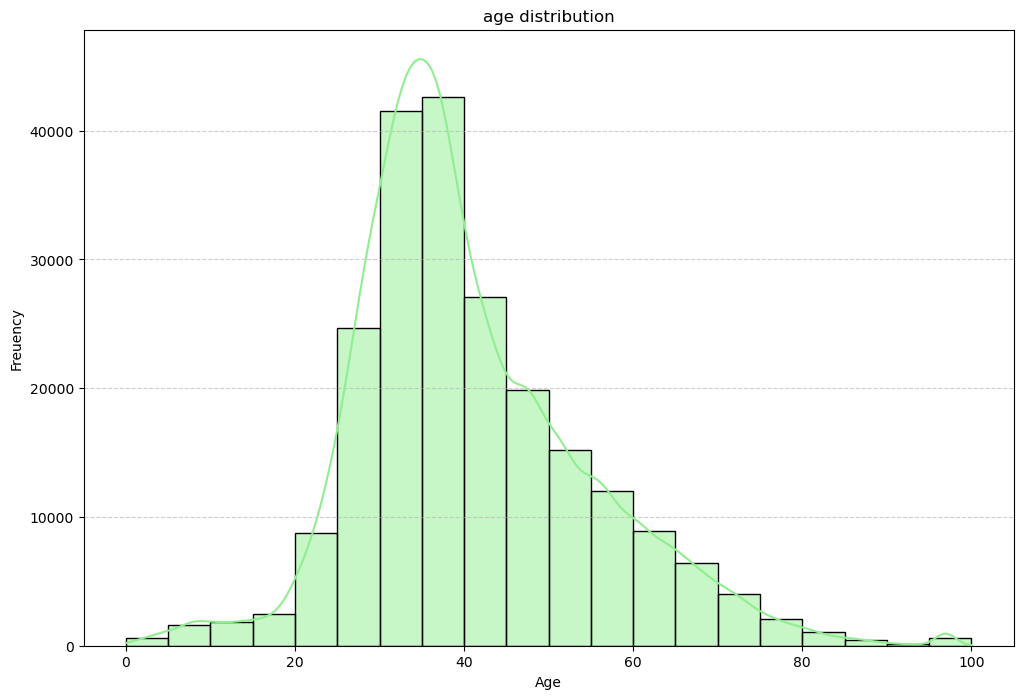

In [27]:
filtered_age = df_ben3['Age'].dropna()

plt.figure(figsize=(12, 8))
sns.histplot(filtered_age, kde=True, bins=20, color='lightgreen')
plt.title('age distribution')
plt.xlabel('Age')
plt.ylabel('Freuency')
plt.grid(axis= 'y', linestyle= '--', alpha= 0.6)
plt.show;



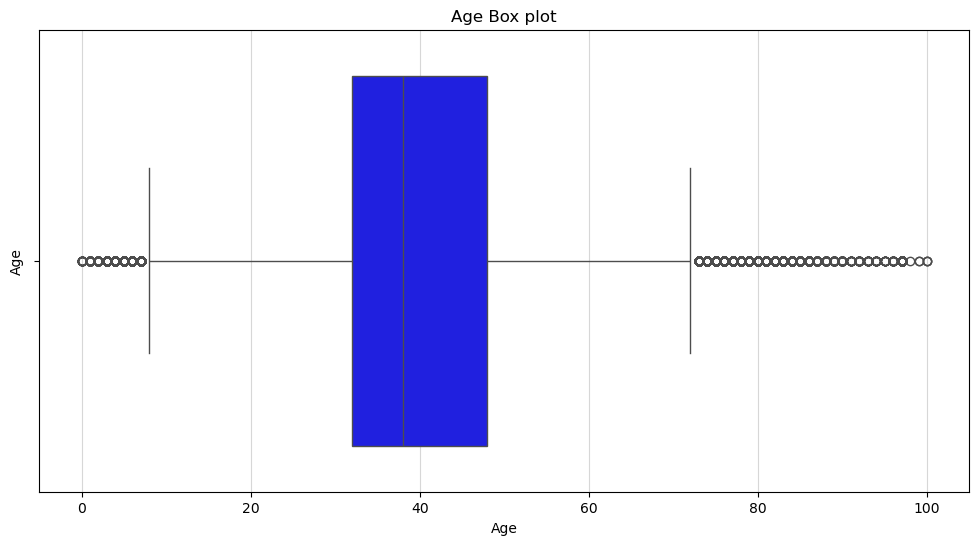

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=filtered_age, color='blue')
plt.title('Age Box plot')
plt.ylabel('Age')
plt.grid(axis="x", alpha= 0.5)

In [29]:
df_ben4 = df_ben3.copy() 
age_bins = [0, 20, 35, 50, float('inf')]
age_lables = ['0-20', '20-35', '35-50',' 50+']

df_ben4['Age_cat'] = pd.cut(df_ben4['Age'], bins=age_bins, labels=age_lables, right=False)
df_ben4


,UserID,Gender,State,BirthDate,ReferralSource,BirthYear,Age,Age_cat
Unnamed: 0,,,,,,,,
0,3,زن,تهران,1984-11-07,Acquaintances,1984.0,34.0,20-35
1,8,مرد,تهران,1985-09-15,Acquaintances,1985.0,33.0,20-35
2,14,مرد,تهران,1977-09-29,Acquaintances,1977.0,41.0,35-50
3,17,زن,تهران,1946-10-15,Acquaintances,1946.0,72.0,50+
4,18,زن,تهران,1955-12-28,Acquaintances,1955.0,63.0,50+
...,...,...,...,...,...,...,...,...
278381,262139,مرد,تهران,1978-07-01,Application,1978.0,40.0,35-50
278382,262140,مرد,تهران,1975-12-22,Application,1975.0,43.0,35-50
278383,262141,مرد,فارس,1994-08-22,Application,1994.0,24.0,20-35


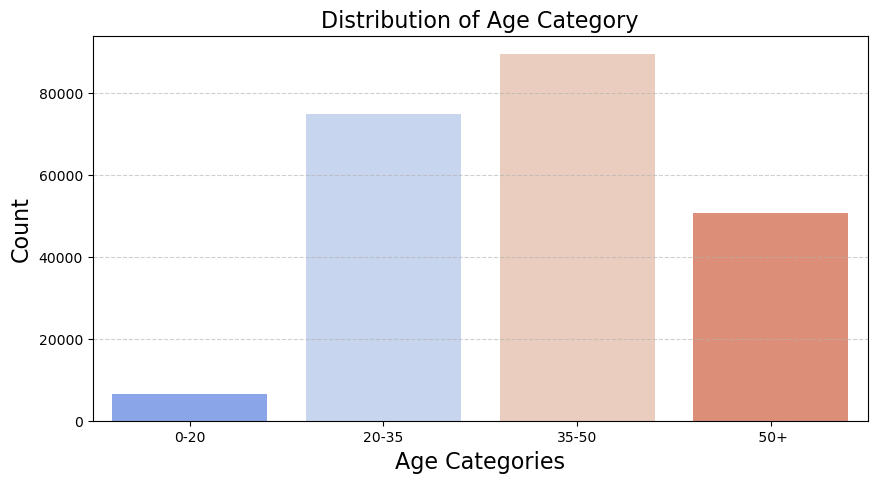

In [30]:
import matplotlib.pylab as plt
import seaborn as sns

age_values = df_ben4['Age_cat'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(y=age_values, x=age_values.index,palette='coolwarm')
plt.title('Distribution of Age Category', fontsize= 16 )
plt.xlabel('Age Categories', fontsize= 16)
plt.ylabel('Count', fontsize= 16)
plt.grid(axis='y',linestyle= '--', alpha= .6 )



### Accuracy Improvement Idea

In [31]:
agg_data['PaymentDate'] = pd.to_datetime(agg_data['PaymentDate'])
last_payment_date = agg_data.groupby('UserID')['PaymentDate'].max().reset_index()
last_payment_date_year = last_payment_date['PaymentDate'].dt.year
df_ben4['Age_accurate'] = last_payment_date_year - df_ben4['BirthYear']
df_ben4

,UserID,Gender,State,BirthDate,ReferralSource,BirthYear,Age,Age_cat,Age_accurate
Unnamed: 0,,,,,,,,,
0,3,زن,تهران,1984-11-07,Acquaintances,1984.0,34.0,20-35,33.0
1,8,مرد,تهران,1985-09-15,Acquaintances,1985.0,33.0,20-35,33.0
2,14,مرد,تهران,1977-09-29,Acquaintances,1977.0,41.0,35-50,41.0
3,17,زن,تهران,1946-10-15,Acquaintances,1946.0,72.0,50+,71.0
4,18,زن,تهران,1955-12-28,Acquaintances,1955.0,63.0,50+,61.0
...,...,...,...,...,...,...,...,...,...
278381,262139,مرد,تهران,1978-07-01,Application,1978.0,40.0,35-50,NaN
278382,262140,مرد,تهران,1975-12-22,Application,1975.0,43.0,35-50,NaN
278383,262141,مرد,فارس,1994-08-22,Application,1994.0,24.0,20-35,NaN


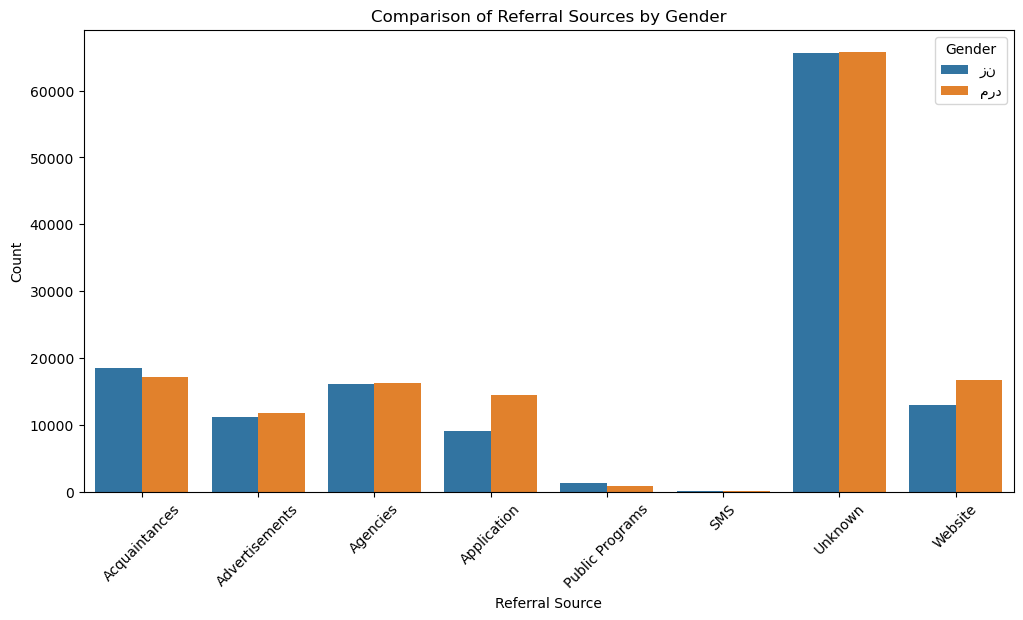

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (Replace with df_ben4)
df = df_ben4.copy()

# Count occurrences of each ReferralSource by Gender
referral_counts = df.groupby(["Gender", "ReferralSource"]).size().reset_index(name="Count")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="ReferralSource", y="Count", hue="Gender", data=referral_counts)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.xlabel("Referral Source")
plt.ylabel("Count")
plt.title("Comparison of Referral Sources by Gender")
plt.legend(title="Gender")

# Show plot
plt.show()


### state classification

In [33]:
df_ben4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278386 entries, 0 to 278385
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   UserID          278386 non-null  int64         
 1   Gender          278149 non-null  object        
 2   State           278386 non-null  object        
 3   BirthDate       221814 non-null  datetime64[ns]
 4   ReferralSource  278386 non-null  object        
 5   BirthYear       221814 non-null  float64       
 6   Age             221761 non-null  float64       
 7   Age_cat         221761 non-null  category      
 8   Age_accurate    77482 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 19.4+ MB


In [34]:
def category(State):
    if State =='تهران':
        return 'Tehran'
    elif State== 'البرز':
        return 'Alborz'
    else:
        return 'other'



df_ben4['State_cat'] = df_ben4['State'].apply(category)
df_ben4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278386 entries, 0 to 278385
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   UserID          278386 non-null  int64         
 1   Gender          278149 non-null  object        
 2   State           278386 non-null  object        
 3   BirthDate       221814 non-null  datetime64[ns]
 4   ReferralSource  278386 non-null  object        
 5   BirthYear       221814 non-null  float64       
 6   Age             221761 non-null  float64       
 7   Age_cat         221761 non-null  category      
 8   Age_accurate    77482 non-null   float64       
 9   State_cat       278386 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 21.5+ MB


In [35]:
df_ben4.State_cat.unique()

array(['Tehran', 'other', 'Alborz'], dtype=object)

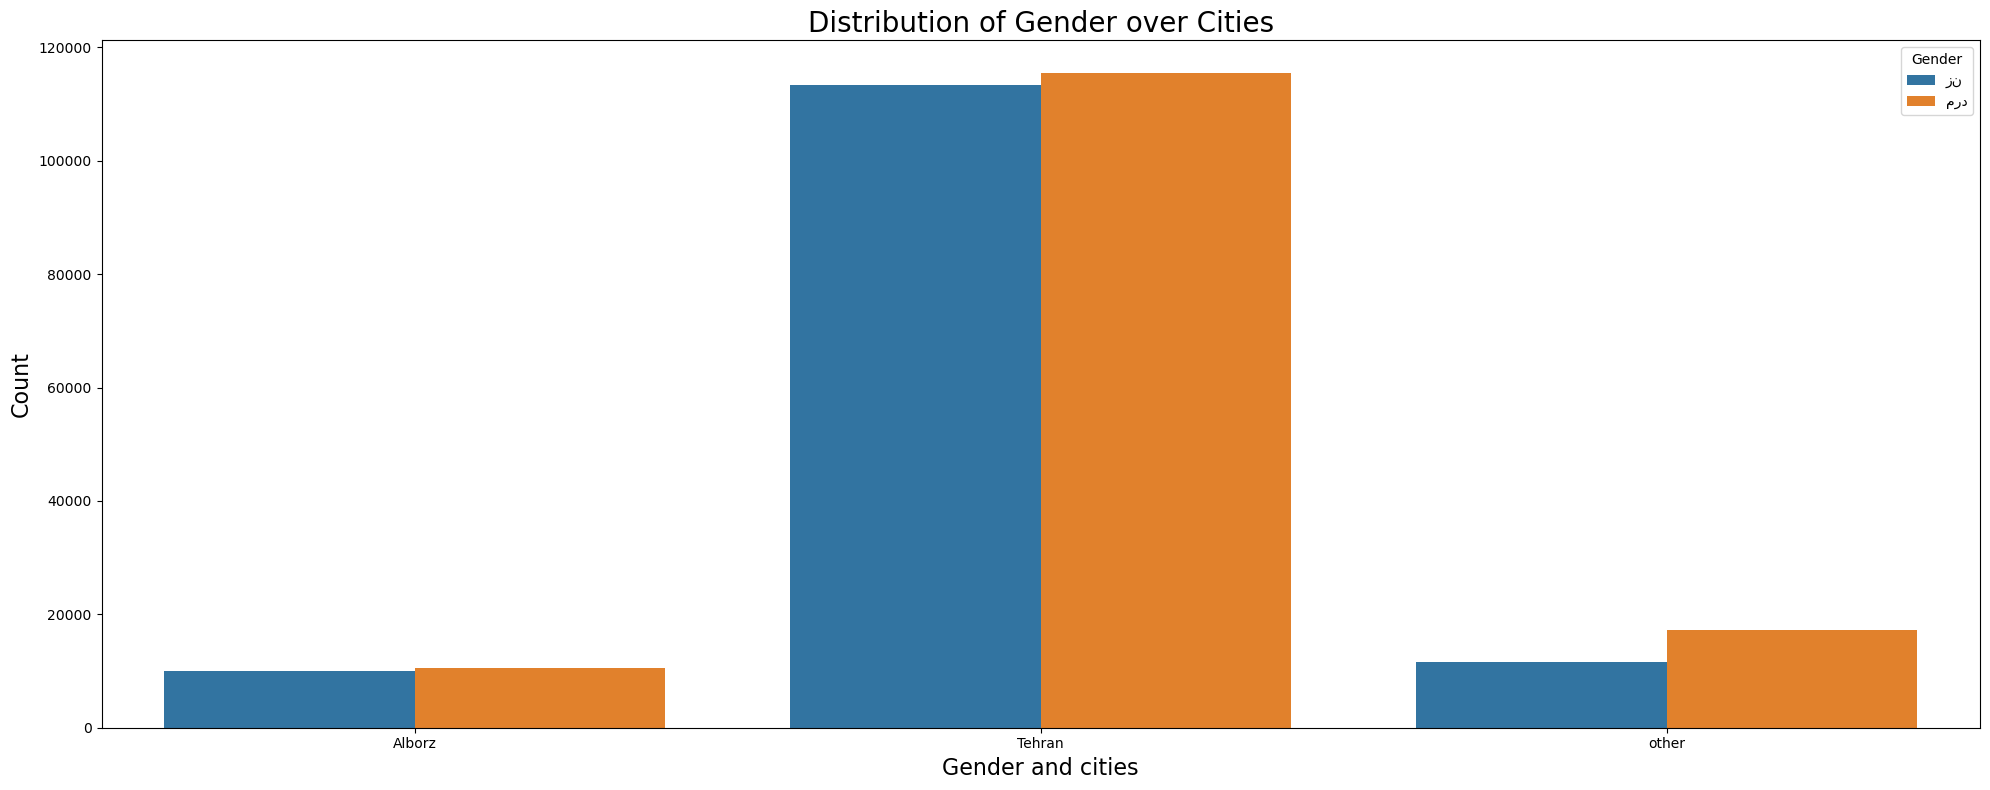

In [36]:
data1 = df_ben4.groupby(['State_cat', 'Gender']).size().reset_index(name='count')
plt.figure(figsize=(20, 8))
sns.barplot(data=data1, x='State_cat', y='count', hue='Gender')
plt.title('Distribution of Gender over Cities', fontsize=20)
plt.xlabel('Gender and cities', fontsize=16)
plt.ylabel('Count', fontsize= 16)
plt.tight_layout()
plt.show();

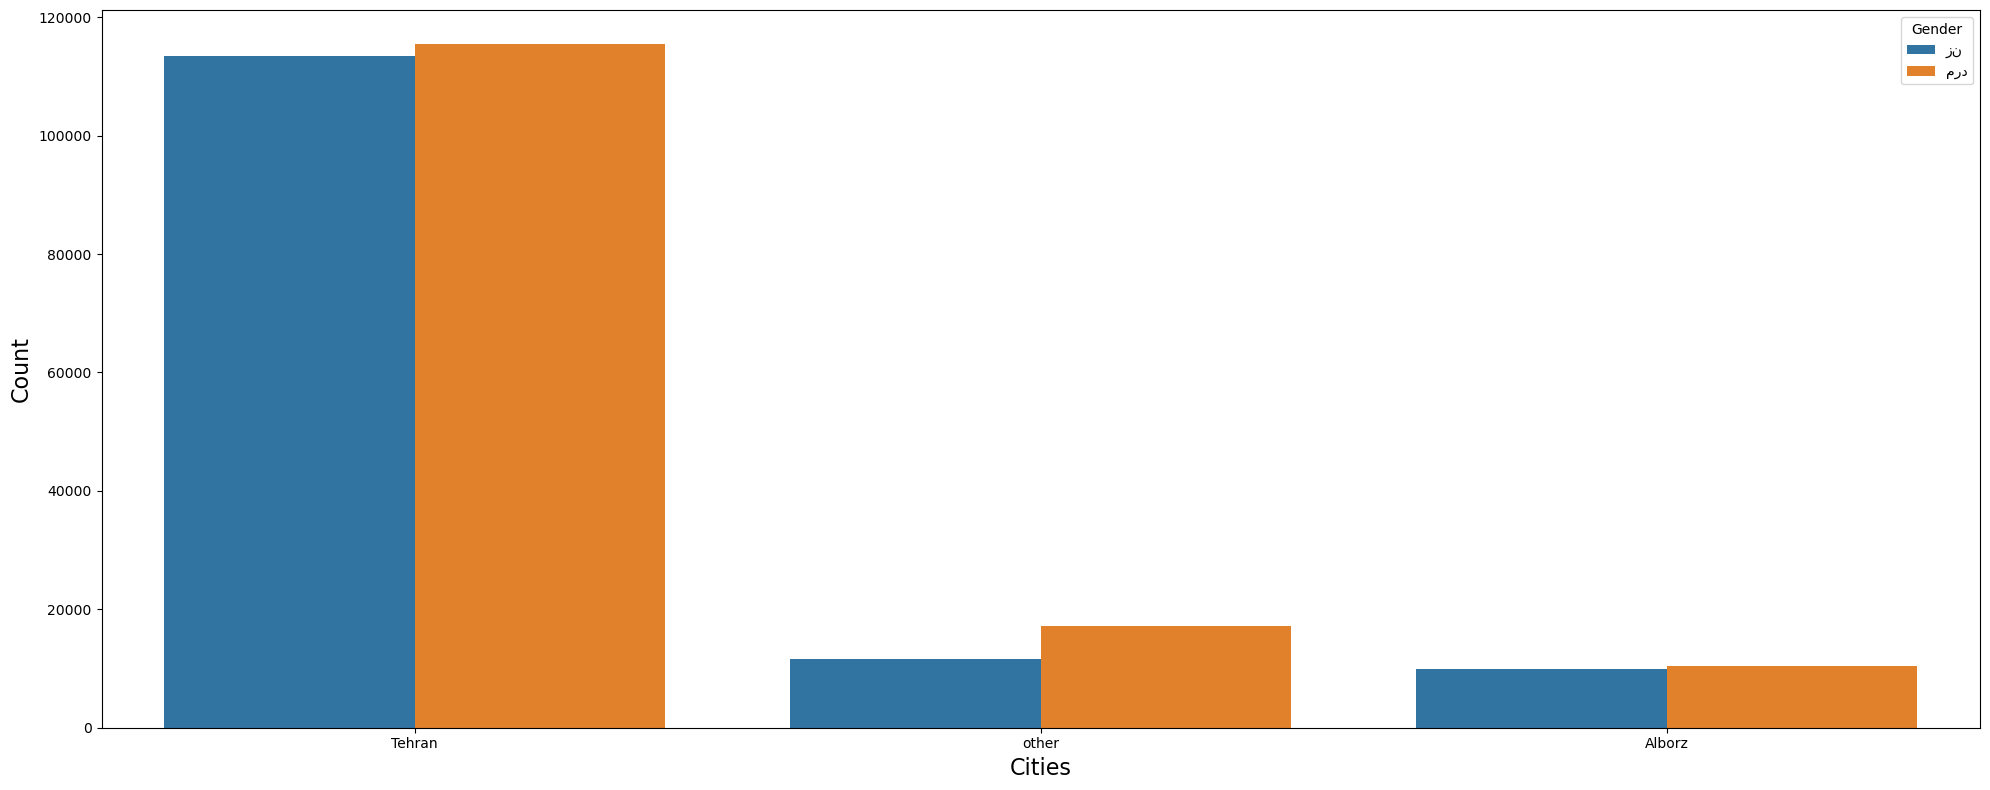

In [37]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df_ben4, x='State_cat', hue='Gender')
plt.xlabel('Cities', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.tight_layout()
plt.show()


In [38]:
(df_ben4.isnull().sum() / len(df_ben4) *100).round(2).astype('str') + '%'


UserID              0.0%
Gender             0.09%
State               0.0%
BirthDate         20.32%
ReferralSource      0.0%
BirthYear         20.32%
Age               20.34%
Age_cat           20.34%
Age_accurate      72.17%
State_cat           0.0%
dtype: object

In [39]:
import pandas as pd
from sklearn.impute import KNNImputer
df_ben5 = df_ben4.copy()
missing_counts = df_ben5.isnull().sum()
missing_percentage = (missing_counts / len(df_ben5)) *100

print(' missing value counts :\n', missing_counts)
print("misinis values percent: \n ", missing_percentage)


for col in df_ben5.columns:
    if missing_percentage[col] > 0:
        if df_ben5[col].dtype == 'object':  # for categorical
            mode_value = df_ben5[col].mode()[0]
            df_ben5[col].fillna(mode_value, inplace=True)
        elif df_ben5[col].dtype == 'category':
             mode_value = df_ben5[col].mode()[0]
             df_ben5[col].fillna(mode_value, inplace=True)
        elif  df_ben5[col].dtype == 'float64' or df_ben5[col].dtype =='int64':
              median_value =df_ben5[col].median()
              df_ben5[col].fillna(median_value, inplace=True)
        elif df_ben5[col].dtype == 'datetime64[ns]':
             median_date = df_ben5[col].median()
             df_ben5[col].fillna(median_date, inplace=True)

cloumns_to_knn = missing_percentage[missing_percentage > 5].index
if len(cloumns_to_knn) > 0:
     imputer = KNNImputer(n_neighbors=5)

     numerical_data = df_ben5[cloumns_to_knn].select_dtypes(include=['float64', 'int64'])
     df_ben5[numerical_data.columns] = imputer.fit_transform(numerical_data)
print('after imputing data:\n', df_ben5.isnull().sum())
     



 missing value counts :
 UserID                 0
Gender               237
State                  0
BirthDate          56572
ReferralSource         0
BirthYear          56572
Age                56625
Age_cat            56625
Age_accurate      200904
State_cat              0
dtype: int64
misinis values percent: 
  UserID             0.000000
Gender             0.085134
State              0.000000
BirthDate         20.321424
ReferralSource     0.000000
BirthYear         20.321424
Age               20.340463
Age_cat           20.340463
Age_accurate      72.167422
State_cat          0.000000
dtype: float64
after imputing data:
 UserID            0
Gender            0
State             0
BirthDate         0
ReferralSource    0
BirthYear         0
Age               0
Age_cat           0
Age_accurate      0
State_cat         0
dtype: int64


# Data Modeling

In [40]:
final_agg

,UserID,R,F,M,D,R_score,F_score,M_score,D_score
0,0,360,2,800000,365,3,2,2,4
1,1,85,1,150000,0,4,1,1,1
2,3,216,7,290000,542,3,3,1,4
3,5,434,1,10000000,0,2,1,5,1
4,11,824,1,200000,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
94273,278376,1,1,10000,0,5,1,1,1
94274,278377,0,1,10000,0,5,1,1,1
94275,278378,0,1,50000,0,5,1,1,1
94276,278379,0,1,20000,0,5,1,1,1


In [41]:
X = final_agg[['R_score', 'F_score', 'M_score', 'D_score']]
X

,R_score,F_score,M_score,D_score
0,3,2,2,4
1,4,1,1,1
2,3,3,1,4
3,2,1,5,1
4,1,1,1,1
...,...,...,...,...
94273,5,1,1,1
94274,5,1,1,1
94275,5,1,1,1
94276,5,1,1,1


In [42]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


km_model = KMeans(n_clusters=5, random_state=111 )

km_model.fit(X)

labels= km_model.predict(X)

silhouette_avg = silhouette_score(X, labels)
silhouette= silhouette_samples(X, labels)

print('sillouette score is:', silhouette_avg)

kmeans_data = X.copy()
kmeans_data['cluster'] = labels
kmeans_data['silouette']= silhouette

sillouette score is: 0.3288835677221957


In [43]:
kmeans_data 


,R_score,F_score,M_score,D_score,cluster,silouette
0,3,2,2,4,3,0.079584
1,4,1,1,1,4,0.342449
2,3,3,1,4,2,0.109131
3,2,1,5,1,0,0.093081
4,1,1,1,1,0,0.602914
...,...,...,...,...,...,...
94273,5,1,1,1,4,0.505656
94274,5,1,1,1,4,0.505656
94275,5,1,1,1,4,0.505656
94276,5,1,1,1,4,0.505656


In [44]:
wss = km_model.inertia_
print('wss is equal to:', wss)
km_model.cluster_centers_


wss is equal to: 203258.46128624736


array([[1.81204091, 1.        , 1.45044166, 1.        ],
       [4.51360309, 4.24416517, 4.00055241, 4.7113198 ],
       [4.31724869, 3.38123396, 1.74612295, 4.20539998],
       [2.06906998, 2.31450066, 1.89760679, 2.67393719],
       [4.44099752, 1.58138661, 1.61909412, 1.70292196]])

## Elbow Visualizer

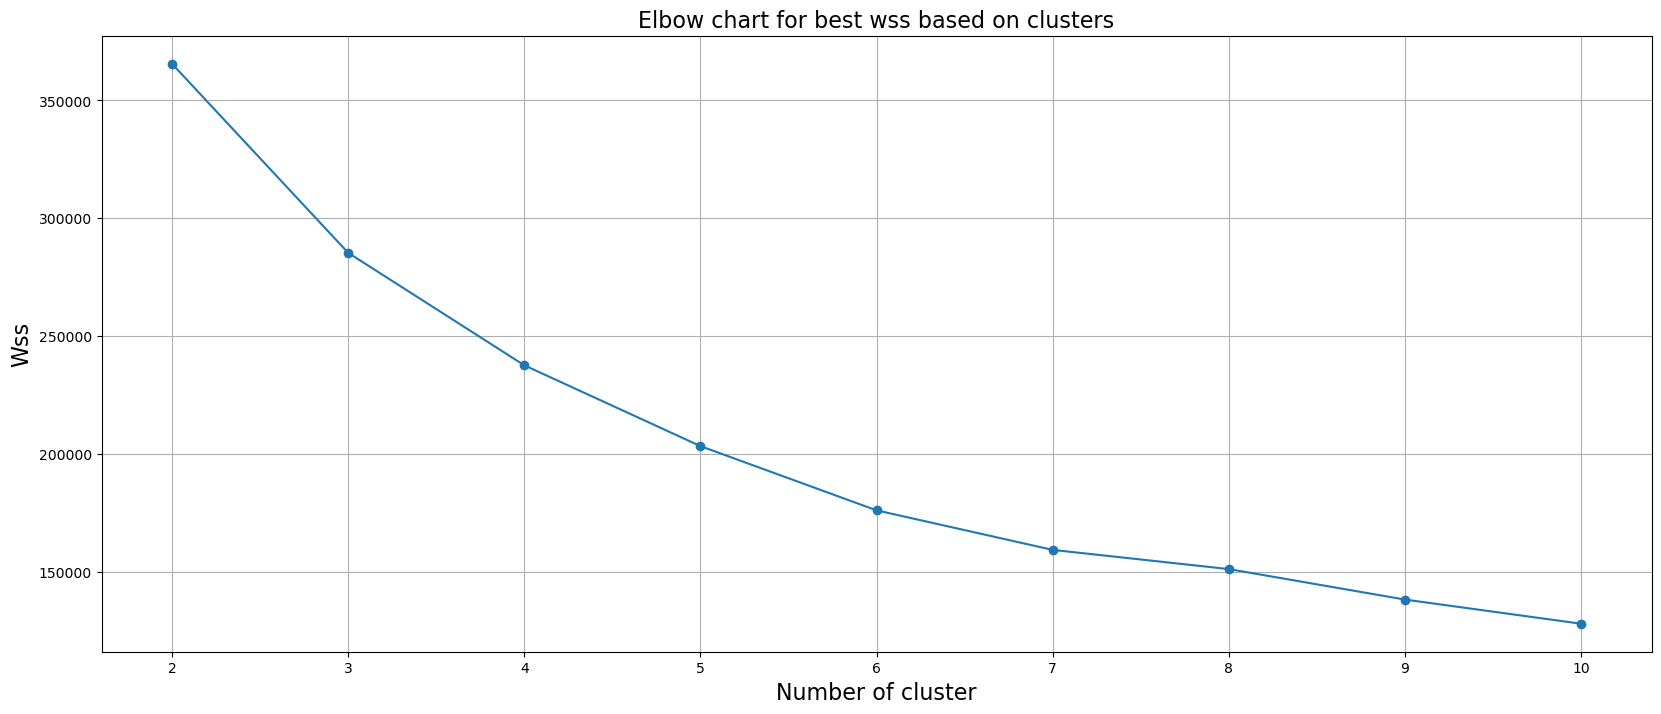

In [45]:
cluseter_range = range(2, 11)
wss = []
for n_cluser in cluseter_range:
    model = KMeans(n_clusters=n_cluser, random_state=111)
    model.fit(X)
    wss.append(model.inertia_)

plt.figure(figsize=(20,8))
plt.plot(cluseter_range, wss, marker='o')
plt.title('Elbow chart for best wss based on clusters', fontsize=16)
plt.xlabel('Number of cluster', fontsize= 16)
plt.ylabel('Wss', fontsize= 16)
plt.grid(True)
plt.show;

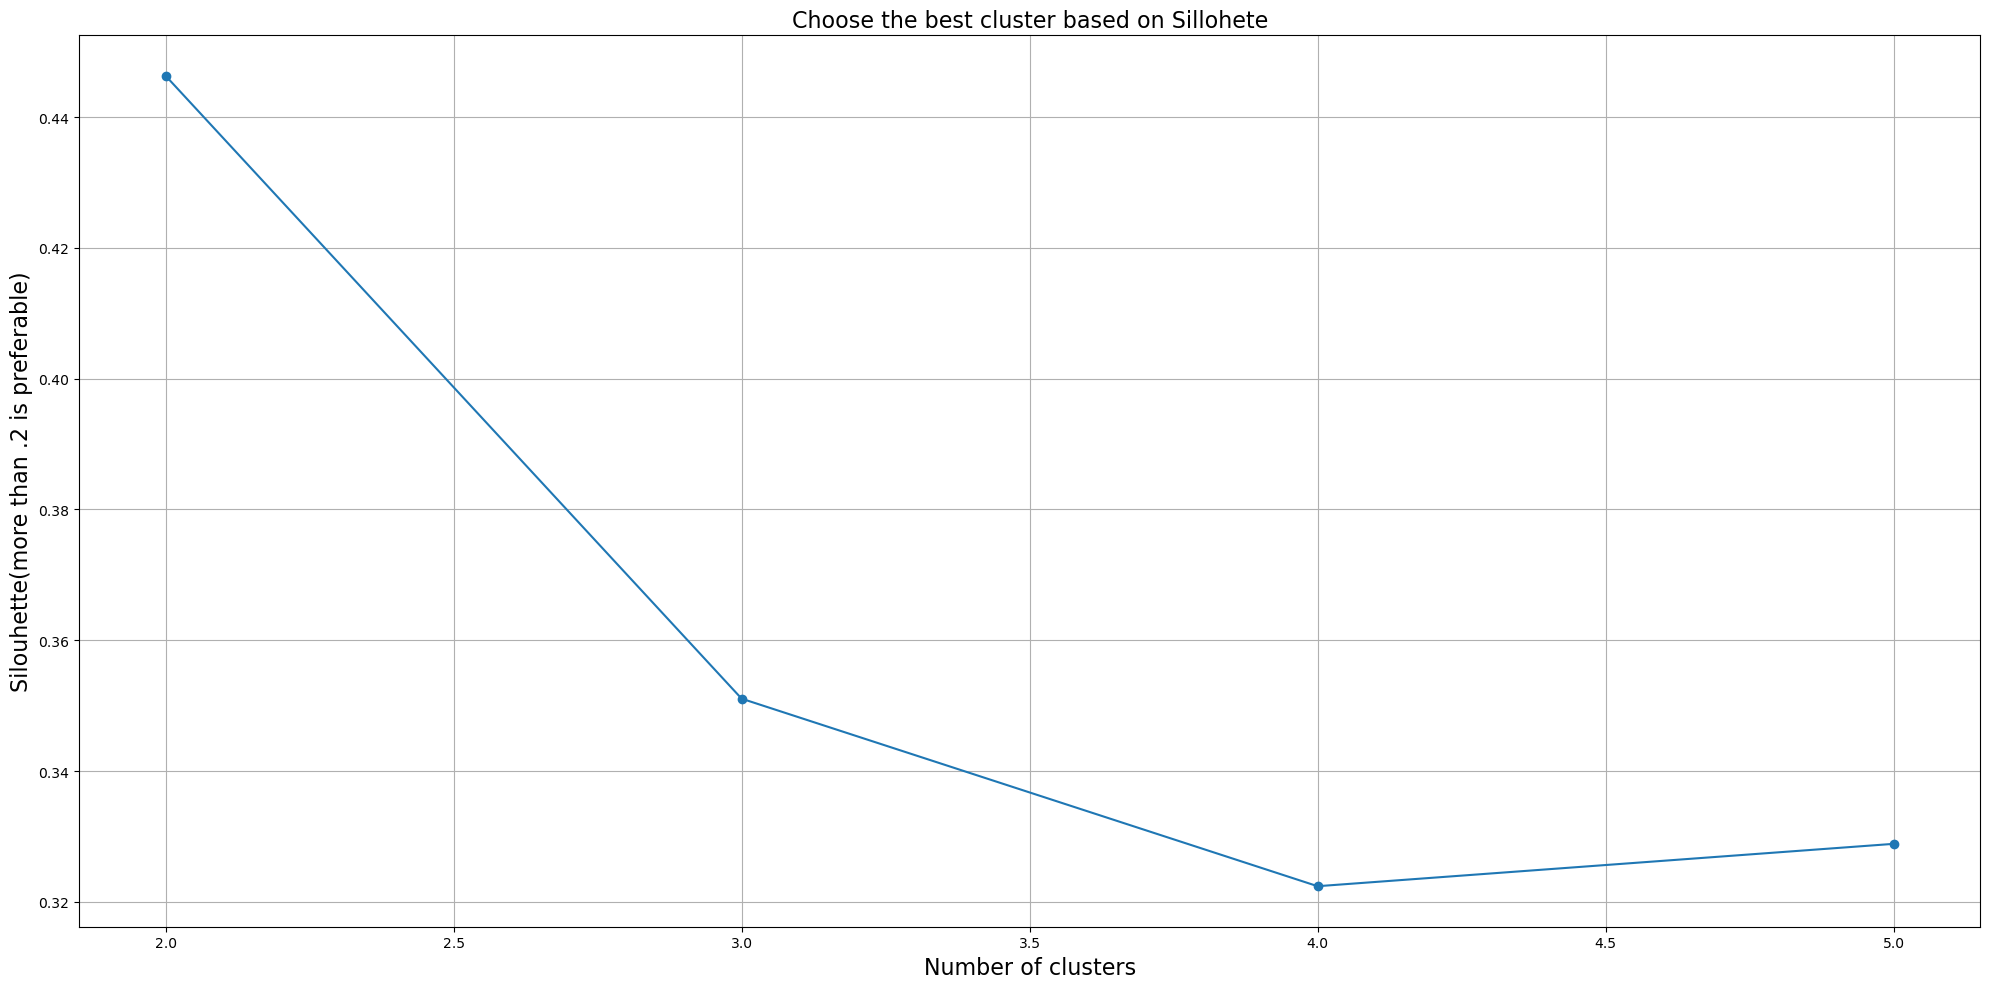

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pylab as plt

cluseter_range = range(2,6)
silhouette_avg = []

for n_cluser in cluseter_range:
    model = KMeans(n_clusters=n_cluser, random_state=111)
    model.fit(X)
    labels = model.predict(X)
    silhouette = silhouette_score(X, labels)
    silhouette_records = silhouette_samples(X, labels)
    silhouette_avg.append(silhouette)

plt.figure(figsize=(20, 10))
plt.plot(cluseter_range, silhouette_avg, marker= 'o' )
plt.title('Choose the best cluster based on Sillohete',fontsize= 16)
plt.xlabel('Number of clusters', fontsize= 16)
plt.ylabel('Silouhette(more than .2 is preferable)', fontsize= 16)
plt.tight_layout()
plt.grid(True)
plt.show();


In [47]:
#df_all_data = kmeans_data[[scores]].copy()
#df_all_data['cluster'] = 'all data'
#df_all_data

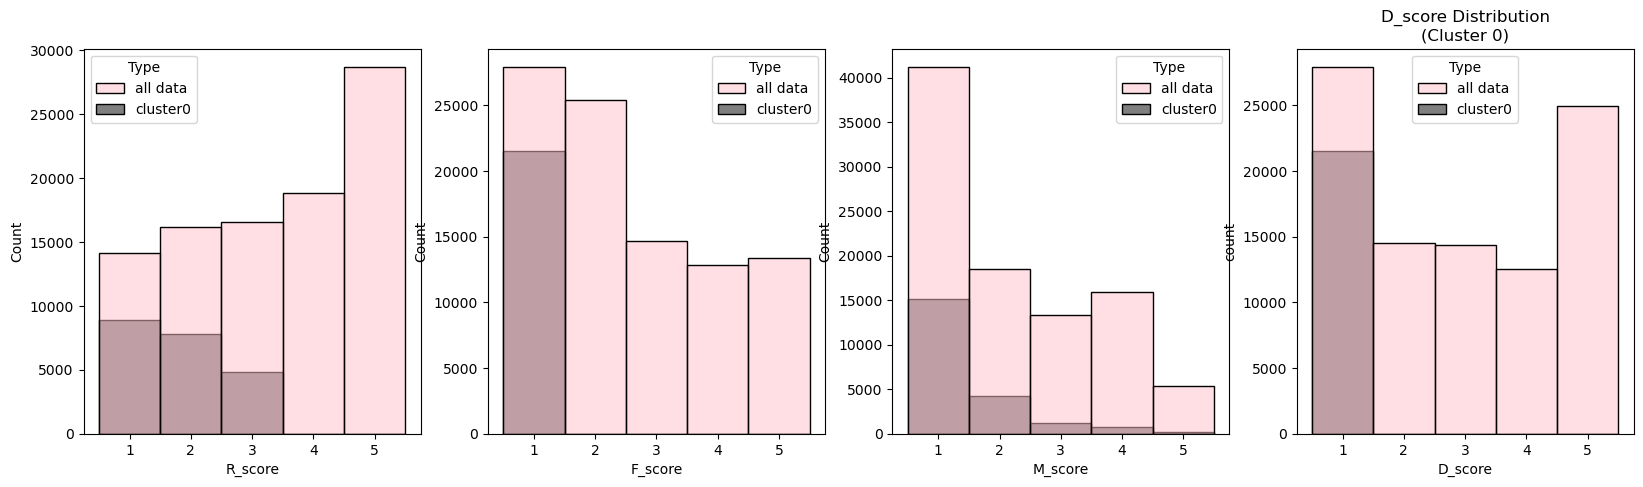

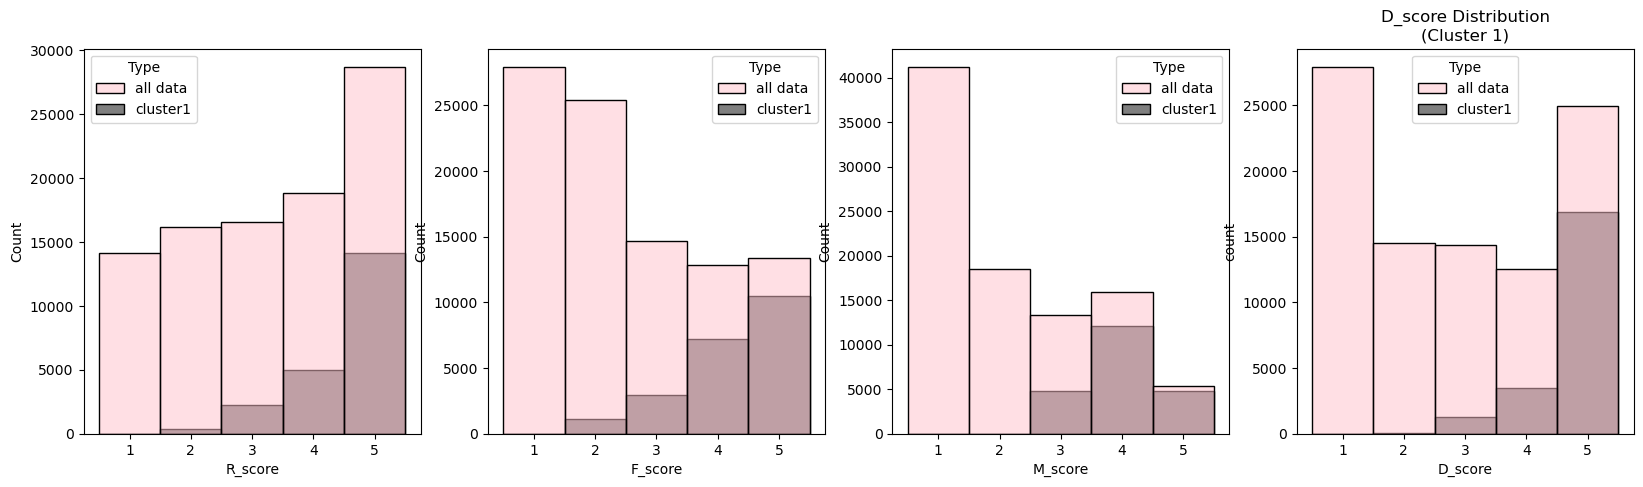

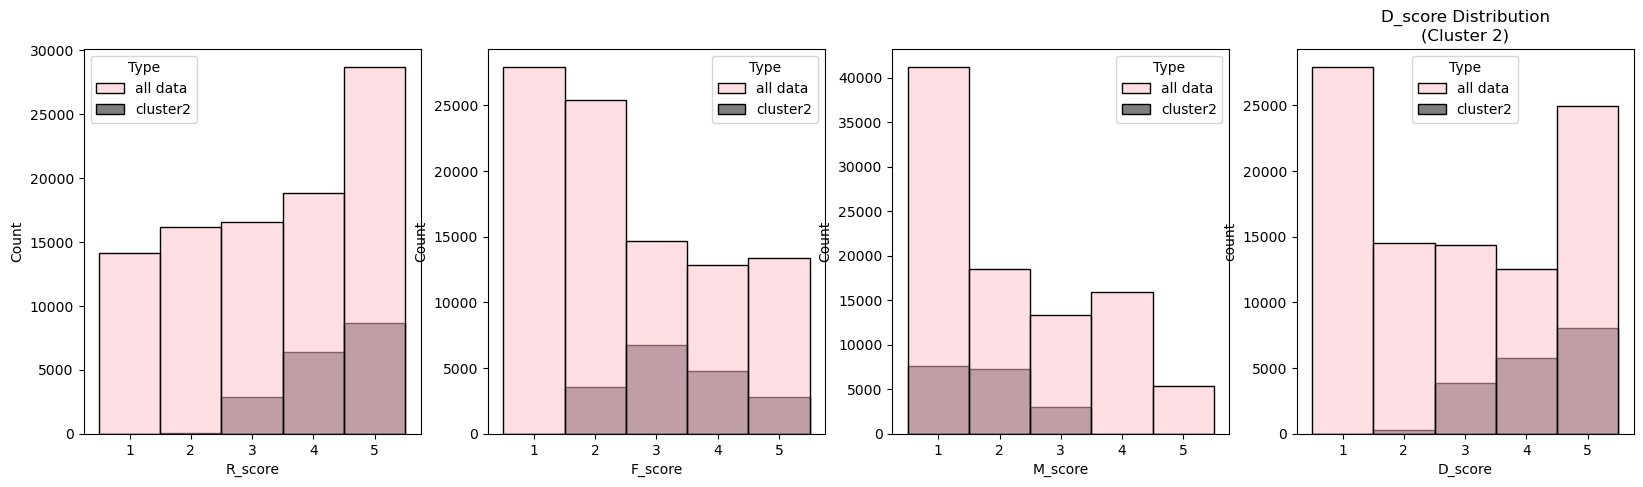

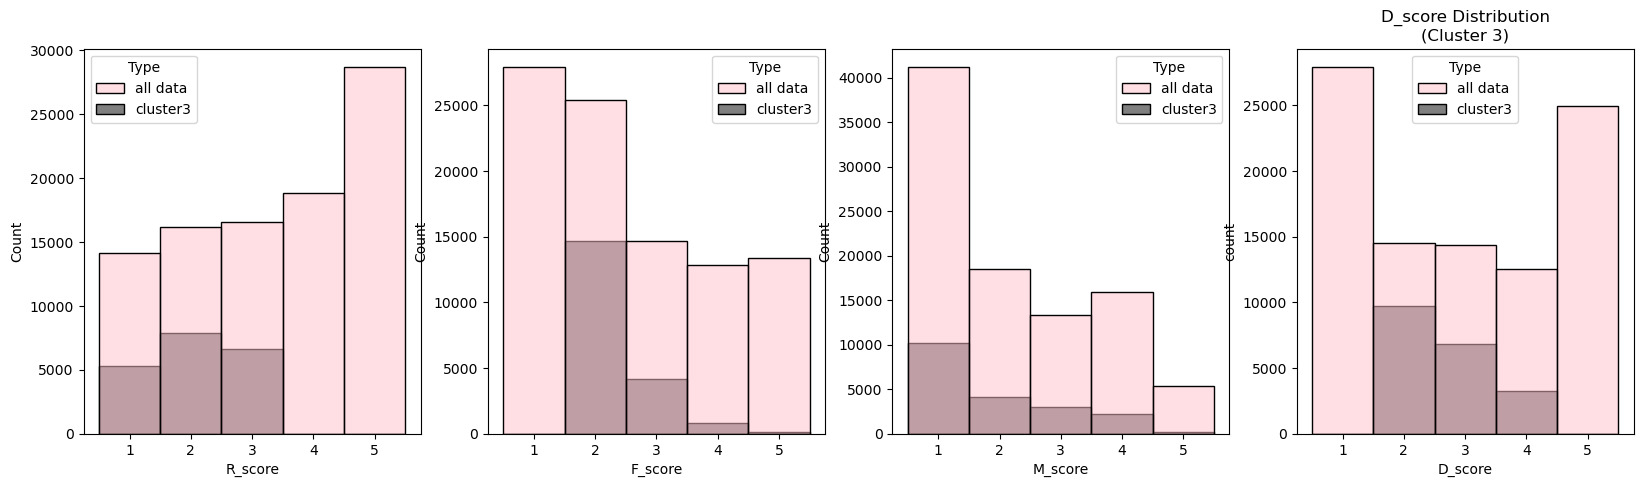

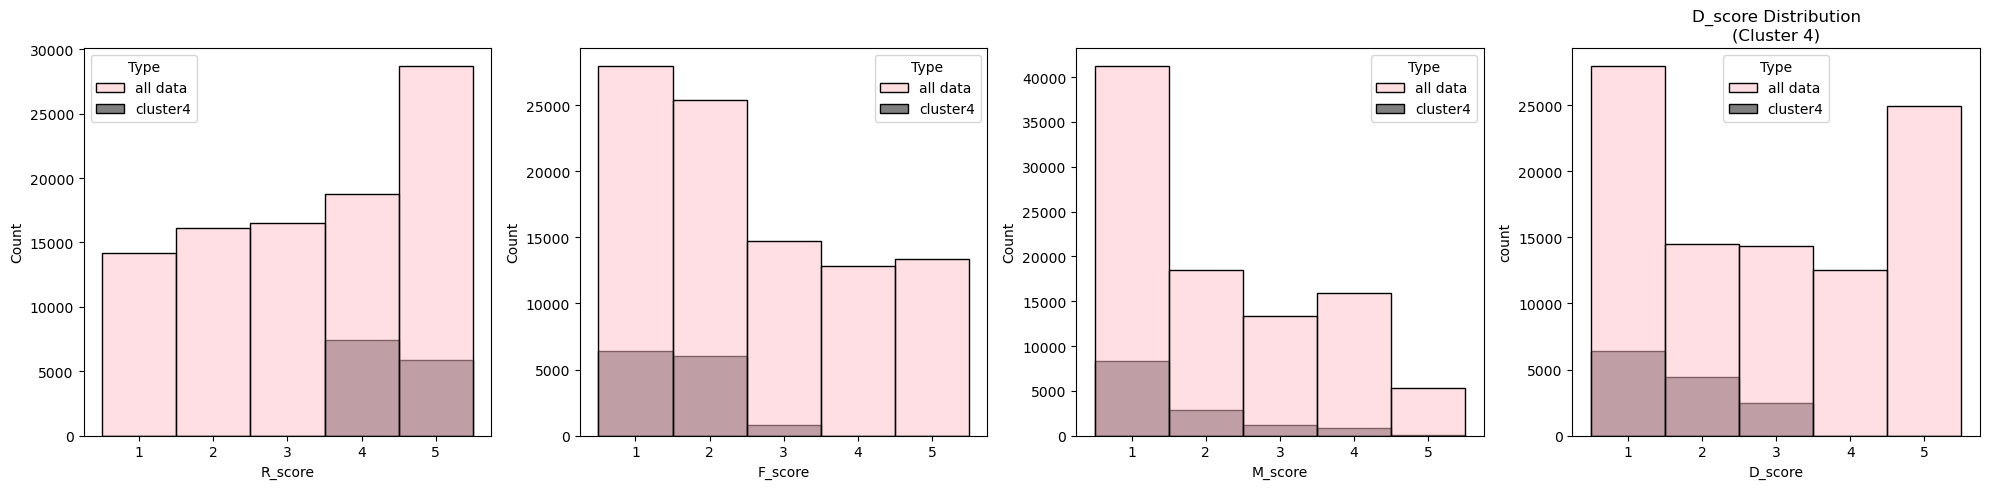

In [48]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

scores = ['R_score', 'F_score', 'M_score', 'D_score']
clusters = sorted(kmeans_data['cluster'].unique())

for cluster in clusters:
    #set up matplotlib fig
    fig , axes = plt.subplots(1, len(scores), figsize=(20, 5))
    ax= axes[i]

    

    # loop over each score and make box plot
    for i ,score in enumerate(scores):
        ax = axes[i]

        # Combine the all data and cluster data into one DataFrame for plotting
        all_data = pd.DataFrame({score: kmeans_data[score], 'Type': 'all data'})
        data_cluster = pd.DataFrame({score:kmeans_data[kmeans_data['cluster'] ==cluster][score], 'Type': f'cluster{cluster}'})
        combinated_data = pd.concat([all_data, data_cluster])

        # Plot the count plot for the combined data
        sns.histplot(x=score, hue='Type', data=combinated_data, ax=ax, palette=['pink', 'black'], bins= 10, kde= False, stat='count', alpha= .5 )
        plt.title(f'{score} Distribution\n(Cluster {cluster})')
        plt.xlabel(score)
        plt.ylabel('count')

plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

scores = ['R_score', 'F_score', 'M_score', 'D_score']

# Set up the matplotlib figure
fig, axes = plt.subplots(1, len(scores), figsize=(15,4))

# Define the colors

pink_color = 'pink'  
dark_pink_color = 'brown'  


# Loop over each score and create a box plot
for i, score in enumerate(scores):
    ax= axes[i]
    
    # Create a DataFrame for all data
    df_all_data = kmeans_data[[score]].copy()
    df_all_data['cluster'] = 'all data'
    
    # Combine the all data DataFrame with the original DataFrame
    combinated_df = pd.concat([kmeans_data['cluster', score,], df_all_data], ignore_index=True)

    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

scores = ['R_Score', 'F_Score', 'M_Score', 'D_Score']

# Set up the matplotlib figure
fig, axes = plt.subplots(1, len(scores), figsize=(15, 4))

# Define the colors
pink_color = 'pink'  
dark_pink_color = 'brown'  

# Loop over each score and create a horizontal box plot
for i, score in enumerate(scores):
    ax = axes[i]    
    
    # Create a DataFrame for all data
    df_all_data = X_kmeans[[score]].copy()
    df_all_data['cluster'] = 'All Data'

    # Combine the all data DataFrame with the original DataFrame
    combined_df = pd.concat([X_kmeans[['cluster', score]], df_all_data], ignore_index=True)

    # Sort the clusters including 'All Data'
    combined_df['cluster'] = pd.Categorical(combined_df['cluster'], categories= clusters + ['All Data'], ordered=True)
    
    ### Convert the score column to numeric ###
    
    combined_df[score] = combined_df[score].astype(int)
    # Create a horizontal box plot
    sns.boxplot(y='cluster', x=score, data=combined_df, palette= [pink_color] * len(clusters) + [dark_pink_color], ax=ax, showfliers=False)

    # Set the title and labels
    ax.set_title(f'{score} Distribution')
    ax.set_xlabel(score)
    ax.set_ylabel('Cluster')

plt.tight_layout()
plt.show()